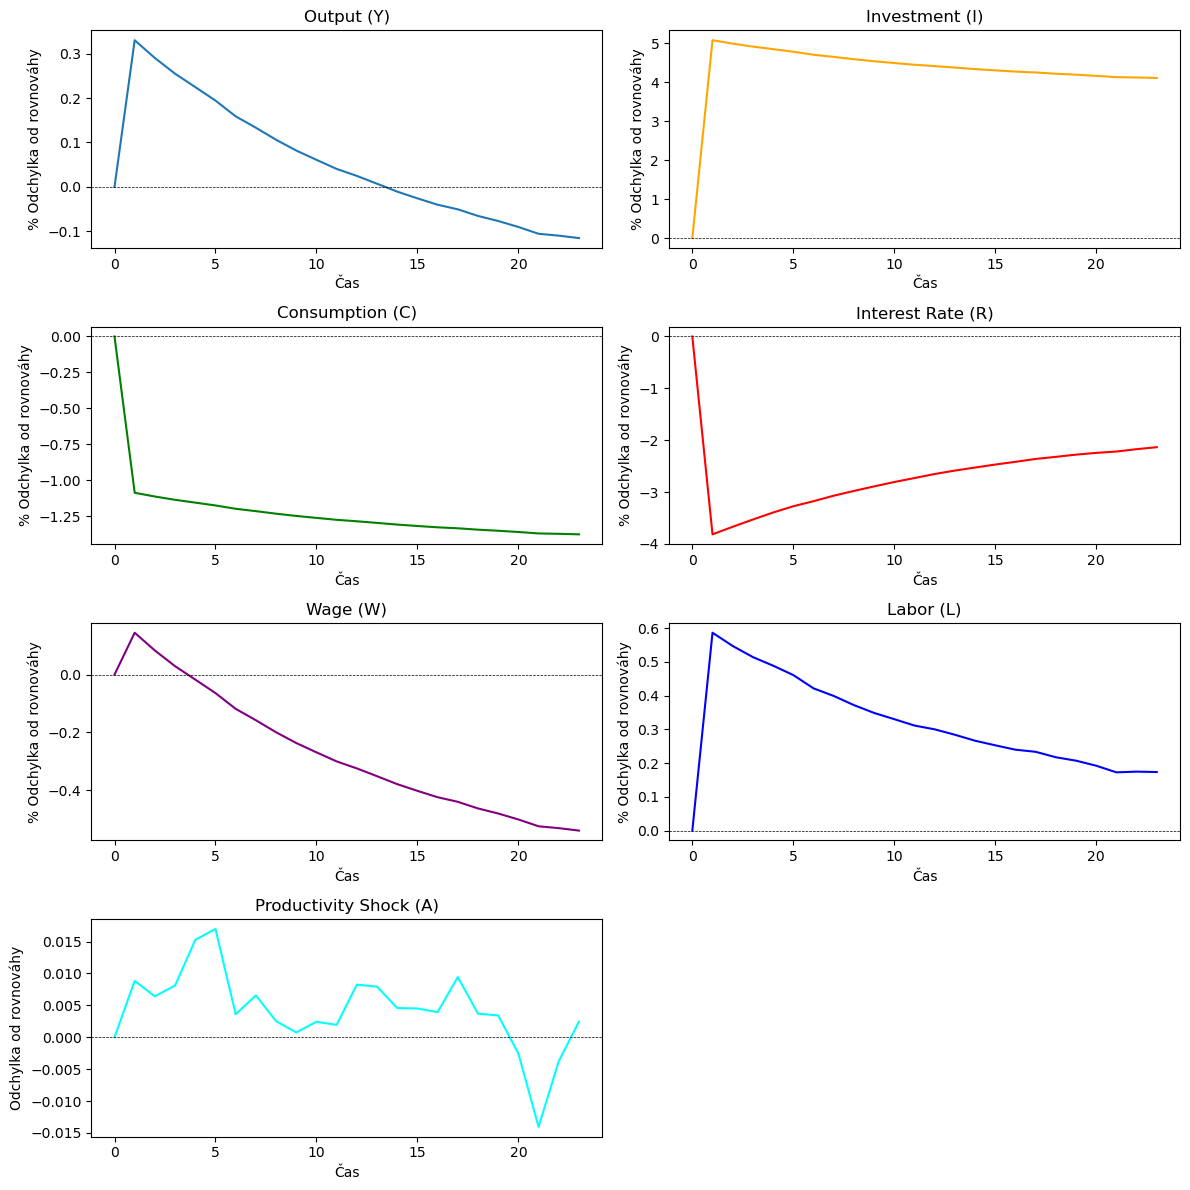

Doba běhu simulace: 0.3325 sekund


In [8]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import time

start_time = time.time()

# Parametry modelu
sigma = 2
phi = 1.5
alpha = 0.35
rhoa = 0.5
phiCss = 0.77
phiIss = 0.23
phiKss = 2.7
delta = phiIss / phiKss
Rss = 1.005 ** (1/4)
Pss = 1
beta = 1 / ((1 - delta) + (Rss / Pss))
Yss = 17.95 ** (1/4)

# Výpočet SS hodnot
Kss = phiKss * Yss
Iss = phiIss * Yss
Css = phiCss * Yss
Lss = (Yss / Kss**alpha) ** (1 / (1 - alpha))
Wss = (1 - alpha) * Yss

# Výpočet IRF
def stochastic_simulation(periods=5000, irf_periods=24):
    np.random.seed(0)
    e_shock = np.random.normal(0, 0.005, periods)

    Y = np.zeros(periods)
    I = np.zeros(periods)
    C = np.zeros(periods)
    R = np.zeros(periods)
    K = np.zeros(periods)
    W = np.zeros(periods)
    L = np.zeros(periods)
    A = np.zeros(periods)

    # Inicializace hodnot na ustáleném stavu
    Y[0], I[0], C[0], R[0], K[0], W[0], L[0], A[0] = Yss, Iss, Css, Rss, Kss, Wss, Lss, 0

    for t in range(1, periods):
        A[t] = rhoa * A[t-1] + e_shock[t-1]
        Y[t] = A[t] + alpha * K[t-1] + (1 - alpha) * Lss
        R[t] = Y[t] - K[t-1]
        W[t] = Y[t] - Lss
        C[t] = (W[t] - phi * Lss) / sigma
        I[t] = Y[t] - C[t]
        K[t] = (1 - delta) * K[t-1] + delta * I[t]
        L[t] = (Y[t] / K[t]**alpha) ** (1 / (1 - alpha))

    return (Y[:irf_periods] - Yss) / Yss, (I[:irf_periods] - Iss) / Iss, \
           (C[:irf_periods] - Css) / Css, (R[:irf_periods] - Rss) / Rss, \
           (W[:irf_periods] - Wss) / Wss, (L[:irf_periods] - Lss) / Lss, \
           A[:irf_periods]

# Výpočet a zobrazení IRF
Y_irf, I_irf, C_irf, R_irf, W_irf, L_irf, A_irf = stochastic_simulation()

# Nastavení grafů vedle sebe pro každou proměnnou
fig, axs = plt.subplots(4, 2, figsize=(12, 12))

# Output (Y)
axs[0, 0].plot(Y_irf, label="Output (Y) [% odchylka]")
axs[0, 0].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[0, 0].set_title("Output (Y)")
axs[0, 0].set_xlabel("Čas")
axs[0, 0].set_ylabel("% Odchylka od rovnováhy")

# Investment (I)
axs[0, 1].plot(I_irf, label="Investment (I) [% odchylka]", color='orange')
axs[0, 1].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[0, 1].set_title("Investment (I)")
axs[0, 1].set_xlabel("Čas")
axs[0, 1].set_ylabel("% Odchylka od rovnováhy")

# Consumption (C)
axs[1, 0].plot(C_irf, label="Consumption (C) [% odchylka]", color='green')
axs[1, 0].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[1, 0].set_title("Consumption (C)")
axs[1, 0].set_xlabel("Čas")
axs[1, 0].set_ylabel("% Odchylka od rovnováhy")

# Interest Rate (R)
axs[1, 1].plot(R_irf, label="Interest Rate (R) [% odchylka]", color='red')
axs[1, 1].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[1, 1].set_title("Interest Rate (R)")
axs[1, 1].set_xlabel("Čas")
axs[1, 1].set_ylabel("% Odchylka od rovnováhy")

# Wage (W)
axs[2, 0].plot(W_irf, label="Wage (W) [% odchylka]", color='purple')
axs[2, 0].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[2, 0].set_title("Wage (W)")
axs[2, 0].set_xlabel("Čas")
axs[2, 0].set_ylabel("% Odchylka od rovnováhy")

# Labor (L)
axs[2, 1].plot(L_irf, label="Labor (L) [% odchylka]", color='blue')
axs[2, 1].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[2, 1].set_title("Labor (L)")
axs[2, 1].set_xlabel("Čas")
axs[2, 1].set_ylabel("% Odchylka od rovnováhy")

# Productivity shock (A)
axs[3, 0].plot(A_irf, label="Productivity Shock (A)", color='cyan')
axs[3, 0].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[3, 0].set_title("Productivity Shock (A)")
axs[3, 0].set_xlabel("Čas")
axs[3, 0].set_ylabel("Odchylka od rovnováhy")

# Skrytí posledního grafu, který je prázdný
axs[3, 1].axis('off')

# Optimalizace rozložení a zobrazení grafů
plt.tight_layout()
plt.show()

# Měření konečného času
end_time = time.time()
duration = end_time - start_time

print(f"Doba běhu simulace: {duration:.4f} sekund")
